<a href="https://colab.research.google.com/github/jsuj1th/Colab/blob/main/DL/Material/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
! pip install tensorflow
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - accuracy: 0.6981 - loss: 1.0812 - val_accuracy: 0.9144 - val_loss: 0.2724
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9138 - loss: 0.2796 - val_accuracy: 0.9273 - val_loss: 0.2350
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.9461 - loss: 0.1715 - val_accuracy: 0.9511 - val_loss: 0.1677
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.9639 - loss: 0.1172 - val_accuracy: 0.9562 - val_loss: 0.1489
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9729 - loss: 0.0868 - val_accuracy: 0.9614 - val_loss: 0.1355
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9782 - loss: 0.0645 - val_accuracy: 0.9622 - val_loss: 0.1323
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9864 - loss: 0.0455 - val_accuracy: 0.9663 - val_loss: 0.1143
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9897 - loss: 0.0318 - va

**Plotting a validation accuracy comparison**

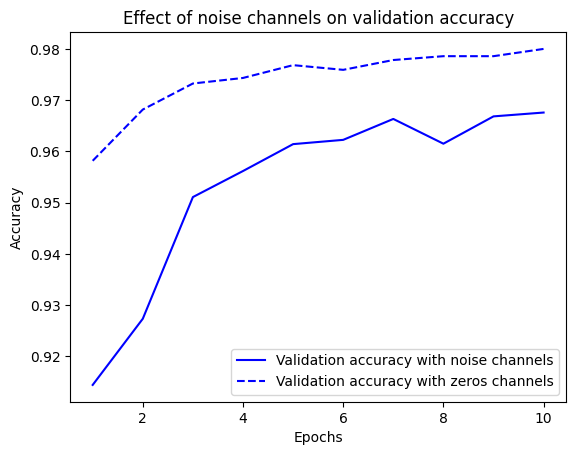

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1033 - loss: 2.3299 - val_accuracy: 0.1011 - val_loss: 2.3061
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.1180 - loss: 2.2978 - val_accuracy: 0.1006 - val_loss: 2.3131
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1320 - loss: 2.2881 - val_accuracy: 0.1033 - val_loss: 2.3226
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1448 - loss: 2.2742 - val_accuracy: 0.0980 - val_loss: 2.3269
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1577 - loss: 2.2580 - val_accuracy: 0.0980 - val_loss: 2.3415
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1719 - loss: 2.2384 - val_accuracy: 0.0995 - val_loss: 2.3560
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1883 - loss: 2.2118 - val_accuracy: 0.0970 - val_loss: 2.3704
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2037 - loss: 2.1848 - 

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3547 - loss: 1980.0815 - val_accuracy: 0.1457 - val_loss: 2.2732
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.1859 - loss: 6.3229 - val_accuracy: 0.1938 - val_loss: 2.1928
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1893 - loss: 2.3966 - val_accuracy: 0.2469 - val_loss: 2.9404
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.2000 - loss: 2.3450 - val_accuracy: 0.1258 - val_loss: 2.2604
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.2024 - loss: 2.3903 - val_accuracy: 0.1992 - val_loss: 2.2689
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2082 - loss: 2.3366 - val_accuracy: 0.2517 - val_loss: 2.1096
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.2194 - loss: 2.4790 - val_accuracy: 0.1483 - val_loss: 2.2077
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.1960 - loss: 2.2365 - val_a

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8359 - loss: 0.8887 - val_accuracy: 0.9484 - val_loss: 0.1777
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9626 - loss: 0.1287 - val_accuracy: 0.9690 - val_loss: 0.1283
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9742 - loss: 0.0966 - val_accuracy: 0.9703 - val_loss: 0.1371
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9809 - loss: 0.0726 - val_accuracy: 0.9708 - val_loss: 0.1529
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9827 - loss: 0.0677 - val_accuracy: 0.9720 - val_loss: 0.1552
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9870 - loss: 0.0525 - val_accuracy: 0.9710 - val_loss: 0.1785
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9874 - loss: 0.0520 - val_accuracy: 0.9687 - val_loss: 0.1971
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9885 - loss: 0.0458 - val_ac

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7265 - loss: 1.0501 - val_accuracy: 0.9053 - val_loss: 0.3602
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9004 - loss: 0.3677 - val_accuracy: 0.9143 - val_loss: 0.3088
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9094 - loss: 0.3243 - val_accuracy: 0.9182 - val_loss: 0.2941
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9149 - loss: 0.3065 - val_accuracy: 0.9225 - val_loss: 0.2827
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9192 - loss: 0.2881 - val_accuracy: 0.9227 - val_loss: 0.2798
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9214 - loss: 0.2850 - val_accuracy: 0.9252 - val_loss: 0.2744
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9247 - loss: 0.2754 - val_accuracy: 0.9258 - val_loss: 0.2715
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9232 - loss: 0.2731 - val_accuracy: 0.

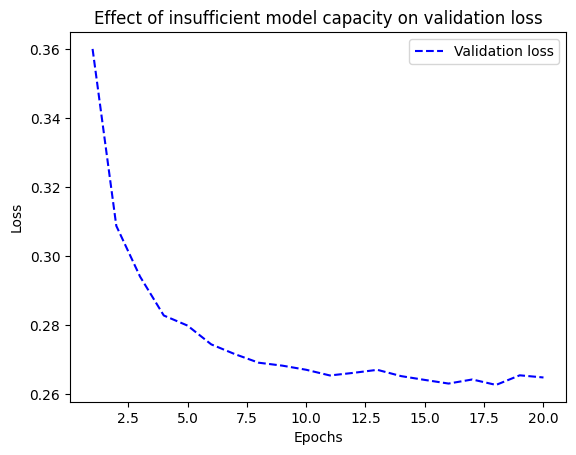

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8333 - loss: 0.6116 - val_accuracy: 0.9438 - val_loss: 0.1889
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9497 - loss: 0.1676 - val_accuracy: 0.9594 - val_loss: 0.1406
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9661 - loss: 0.1126 - val_accuracy: 0.9625 - val_loss: 0.1221
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9720 - loss: 0.0904 - val_accuracy: 0.9670 - val_loss: 0.1145
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9790 - loss: 0.0694 - val_accuracy: 0.9682 - val_loss: 0.1144
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9841 - loss: 0.0541 - val_accuracy: 0.9726 - val_loss: 0.0973
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9864 - loss: 0.0444 - val_accuracy: 0.9730 - val_loss: 0.0984
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9894 - loss: 0.0359 - val_accuracy: 0.

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.7072 - loss: 0.6007 - val_accuracy: 0.8674 - val_loss: 0.4033
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8835 - loss: 0.3606 - val_accuracy: 0.8834 - val_loss: 0.3174
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9178 - loss: 0.2596 - val_accuracy: 0.8833 - val_loss: 0.2917
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9332 - loss: 0.2082 - val_accuracy: 0.8912 - val_loss: 0.2757
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9429 - loss: 0.1744 - val_accuracy: 0.8868 - val_loss: 0.2789
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9506 - loss: 0.1495 - val_accuracy: 0.8878 - val_loss: 0.2831
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9618 - loss: 0.1254 - val_accuracy: 0.8809 - val_loss: 0.3116
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.5567 - loss: 0.6691 - val_accuracy: 0.6627 - val_loss: 0.5968
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.7084 - loss: 0.5711 - val_accuracy: 0.7562 - val_loss: 0.5469
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7977 - loss: 0.5173 - val_accuracy: 0.7635 - val_loss: 0.5211
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8442 - loss: 0.4771 - val_accuracy: 0.8167 - val_loss: 0.4968
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8784 - loss: 0.4469 - val_accuracy: 0.8393 - val_loss: 0.4820
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9002 - loss: 0.4248 - val_accuracy: 0.8762 - val_loss: 0.4645
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9205 - loss: 0.4043 - val_accuracy: 0.8695 - val_loss: 0.4575
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9322 - loss: 0.3812 - val_accuracy: 0.8570 - v

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 350ms/step - accuracy: 0.6374 - loss: 0.6458 - val_accuracy: 0.8559 - val_loss: 0.3780
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 21s 363ms/step - accuracy: 0.8806 - loss: 0.3170 - val_accuracy: 0.8787 - val_loss: 0.2852
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 10s 346ms/step - accuracy: 0.8999 - loss: 0.2484 - val_accuracy: 0.8884 - val_loss: 0.2730
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.9342 - loss: 0.1750 - val_accuracy: 0.8536 - val_loss: 0.4016
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 355ms/step - accuracy: 0.9425 - loss: 0.1505 - val_accuracy: 0.8032 - val_loss: 0.5379
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 20s 348ms/step - accuracy: 0.9509 - loss: 0.1283 - val_accuracy: 0.8851 - val_loss: 0.3243
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 22s 412ms/step - accuracy: 0.9793 - loss: 0.0654 - val_accuracy: 0.8855 - val_loss: 0.3527
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 19s 347ms/step - accuracy: 0.9877 - loss: 0.0521 - val_accu

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.6725 - loss: 0.7184 - val_accuracy: 0.8461 - val_loss: 0.5161
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8885 - loss: 0.4528 - val_accuracy: 0.8809 - val_loss: 0.4055
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9087 - loss: 0.3529 - val_accuracy: 0.8865 - val_loss: 0.3725
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9233 - loss: 0.3083 - val_accuracy: 0.8883 - val_loss: 0.3598
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9339 - loss: 0.2779 - val_accuracy: 0.8758 - val_loss: 0.3763
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9402 - loss: 0.2603 - val_accuracy: 0.8847 - val_loss: 0.3594
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9462 - loss: 0.2438 - val_accuracy: 0.8686 - val_loss: 0.3983
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9487 - loss: 0.2352 - val_accuracy: 0.8825 - v

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5827 - loss: 0.6676 - val_accuracy: 0.8361 - val_loss: 0.5124
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.7506 - loss: 0.5322 - val_accuracy: 0.8701 - val_loss: 0.4023
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8260 - loss: 0.4319 - val_accuracy: 0.8796 - val_loss: 0.3425
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.8618 - loss: 0.3666 - val_accuracy: 0.8885 - val_loss: 0.2987
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8868 - loss: 0.3202 - val_accuracy: 0.8901 - val_loss: 0.2809
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9080 - loss: 0.2743 - val_accuracy: 0.8901 - val_loss: 0.2755
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9196 - loss: 0.2421 - val_accuracy: 0.8919 - val_loss: 0.2754
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9314 - loss: 0.2171 - val_accuracy: 0.8927 - v

## Summary